<a href="https://colab.research.google.com/github/charllote122/EduTech/blob/master/CORD_19_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CORD-19 Data Analysis Project


**Date:** 2025-09-18  

The aim of this project was to analyze the CORD-19 dataset, focusing on the metadata of COVID-19 research papers, and create an interactive Streamlit app to explore the data.  

The project involved:  
- Data loading  
- Data cleaning  
- Exploratory analysis  
- Visualization  
- Interactive presentation through a Streamlit app  

Goal: Gain insights into publication trends, top journals, and common research topics related to COVID-19 while learning deployment techniques.


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chemjorsofi","key":"93738897ef0fe579cb86255e4e4eb4b6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [1]:
!kaggle datasets download -d allen-institute-for-ai/CORD-19-research-challenge -f metadata.csv



Dataset URL: https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge
License(s): other
... resuming from 1648942196 bytes (-1061248335 bytes left) ...
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1769, in dataset_download_cli
    self.dataset_download_file(
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1622, in dataset_download_file
    self.download_file(response, outfile, kaggle.http_client(), quiet, not force)
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 2147, in download_file
    response = http_client.call(
               ^^^^^^^^^^^^^^^^^
TypeError:

In [ ]:
!mv /content/metadata.csv /content/metadata_csv.zip


In [ ]:
!unzip /content/metadata_csv.zip -d /content/


Archive:  /content/metadata_csv.zip
  inflating: /content/metadata.csv   


In [ ]:
!ls -lh /content


total 2.1G
-rw-r--r-- 1 root root 1.6G Jun  6  2022 metadata.csv
-rw-r--r-- 1 root root 561M Jun  6  2022 metadata_csv.zip
drwxr-xr-x 1 root root 4.0K Sep 16 13:40 sample_data


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/metadata.csv', low_memory=False)
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [ ]:

# Show the total number of rows and columns
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (1056660, 19)


In [ ]:
# Check the data type for each column
print("\nColumn data types:")
print(df.dtypes)


Column data types:
cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object


In [ ]:
# Count missing values in a few key columns
important_cols = ['title', 'publish_time', 'journal', 'abstract']
print("\nMissing values in important columns:")
print(df[important_cols].isnull().sum())


Missing values in important columns:
title              503
publish_time      1814
journal          87322
abstract        235544
dtype: int64


In [ ]:
# Get basic statistics for all numeric columns
print("\nSummary statistics for numeric columns:")
print(df.describe())


Summary statistics for numeric columns:
       mag_id         s2_id
count     0.0  9.764680e+05
mean      NaN  2.175871e+08
std       NaN  5.312281e+07
min       NaN  9.600000e+01
25%       NaN  2.211411e+08
50%       NaN  2.320829e+08
75%       NaN  2.373948e+08
max       NaN  2.491936e+08


In [ ]:
# ----- Check how much data is missing in each column -----
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Missing value percentage by column:\n", missing_percent.sort_values(ascending=False))





Missing value percentage by column:
 mag_id              100.000000
arxiv_id             98.651506
pmc_json_files       70.118865
sha                  64.627600
pdf_json_files       64.627600
pmcid                63.131849
who_covidence_id     54.296084
pubmed_id            52.782163
doi                  37.843772
url                  34.990063
abstract             22.291371
journal               8.263964
s2_id                 7.589196
authors               2.258910
publish_time          0.171673
title                 0.047603
cord_uid              0.000000
source_x              0.000000
license               0.000000
dtype: float64


In [ ]:

#  drop columns with more than 70% missing values
high_missing_cols = missing_percent[missing_percent > 70].index
print("\nColumns dropped because they have over 70% missing:", list(high_missing_cols))




Columns dropped because they have over 70% missing: ['mag_id', 'arxiv_id', 'pmc_json_files']


In [ ]:


# Create a cleaned copy of the dataset without those columns
df_clean = df.drop(columns=high_missing_cols)


In [ ]:


# Drop rows that do not have a title or publish_time (essential for analysis)
df_clean = df_clean.dropna(subset=['title', 'publish_time'])



In [ ]:




# ----- Convert publish_time to a proper datetime -----
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')



In [ ]:

# Remove any rows where the date conversion failed
df_clean = df_clean.dropna(subset=['publish_time'])



In [ ]:
# Extract the publication year for time-based analysis
df_clean['year'] = df_clean['publish_time'].dt.year



In [ ]:

# Add a new column with the abstract word count
df_clean['abstract_word_count'] = (
    df_clean['abstract'].fillna('').apply(lambda x: len(x.split()))
)


In [ ]:

# Quick check of the cleaned DataFrame
print("\nCleaned data shape:", df_clean.shape)
df_clean.head()


Cleaned data shape: (518429, 18)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,who_covidence_id,pdf_json_files,url,s2_id,year,abstract_word_count
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,2001,262
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2000,142
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2000,219
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2001,68
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2001,110


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud



In [ ]:

# ----- 1. Count papers by publication year -----
year_counts = df_clean['year'].value_counts().sort_index()
print("Publications per year:\n", year_counts)



Publications per year:
 year
1856         3
1857         1
1860         2
1864         1
1876         1
         ...  
2020    164537
2021    219335
2022     85265
2023         1
2024         1
Name: count, Length: 75, dtype: int64


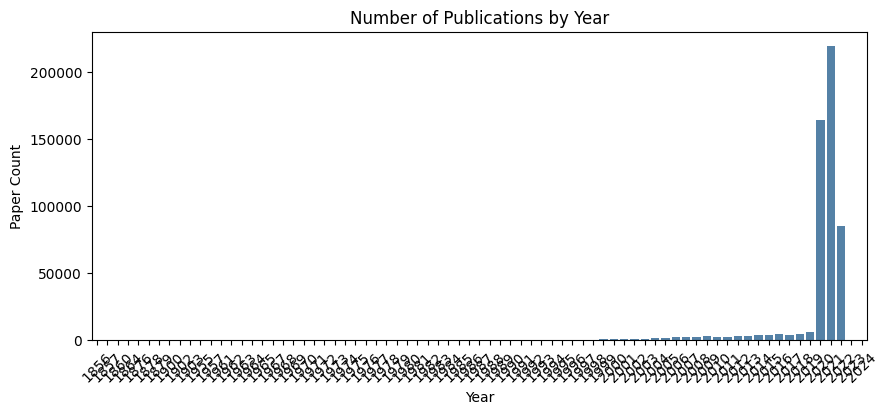

In [ ]:

plt.figure(figsize=(10,4))
sns.barplot(x=year_counts.index, y=year_counts.values, color='steelblue')
plt.title("Number of Publications by Year")
plt.xlabel("Year")
plt.ylabel("Paper Count")
plt.xticks(rotation=45)
plt.show()



In [ ]:


# ----- 2. Identify top journals -----
top_journals = df_clean['journal'].value_counts().head(10)
print("\nTop 10 Journals:\n", top_journals)




Top 10 Journals:
 journal
bioRxiv                            8874
Int J Environ Res Public Health    8200
PLoS One                           7154
Sci Rep                            4160
Reactions Weekly                   3698
Front Psychol                      3265
BMJ                                3003
Cureus                             2959
Front Immunol                      2674
Viruses                            2575
Name: count, dtype: int64


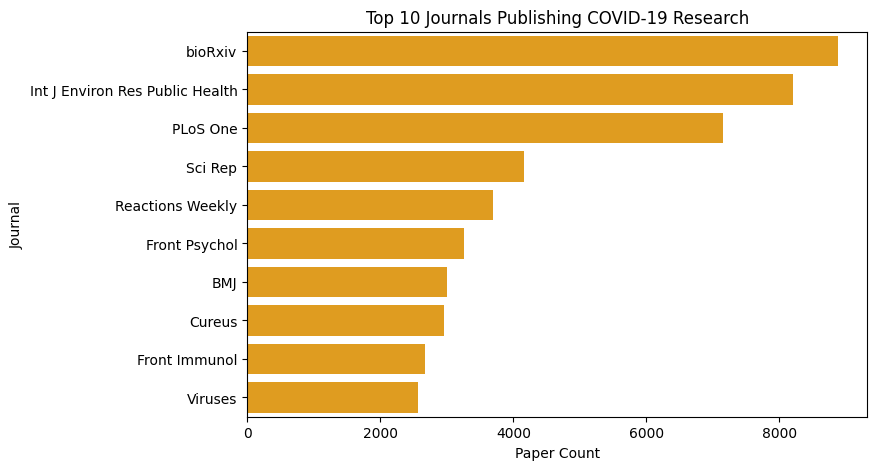

In [ ]:

plt.figure(figsize=(8,5))
sns.barplot(y=top_journals.index, x=top_journals.values, color='orange')
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Paper Count")
plt.ylabel("Journal")
plt.show()



In [ ]:




# ----- 3. Find most frequent words in titles -----
def clean_words(text):
    return re.findall(r'\b[a-z]{4,}\b', str(text).lower())  # words with >=4 letters

title_words = Counter()
df_clean['title'].dropna().apply(lambda t: title_words.update(clean_words(t)))
print("\nMost common words in titles:\n", title_words.most_common(20))




Most common words in titles:
 [('covid', 199862), ('with', 82495), ('pandemic', 54916), ('sars', 53136), ('during', 47854), ('patients', 46426), ('study', 40330), ('from', 36464), ('health', 33970), ('disease', 26978), ('analysis', 24956), ('infection', 24768), ('care', 23355), ('review', 23147), ('based', 22633), ('coronavirus', 22559), ('case', 19034), ('impact', 19025), ('clinical', 18750), ('among', 17557)]


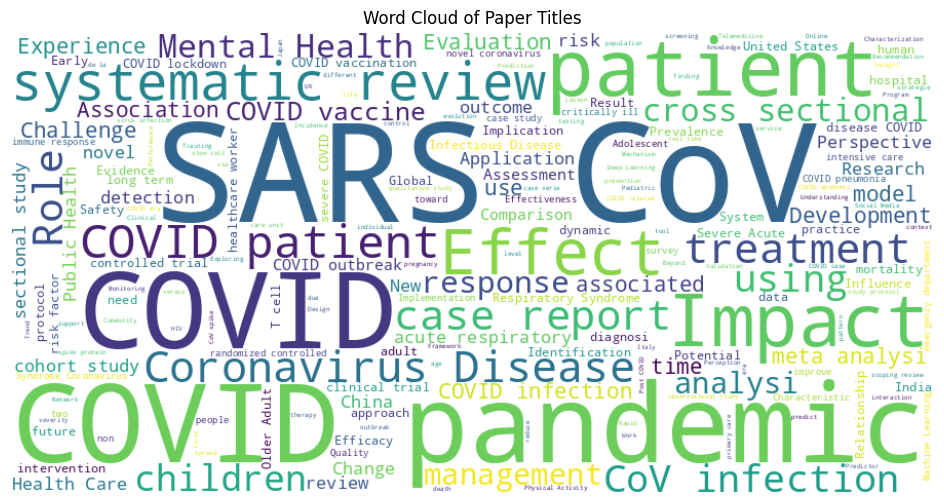

In [ ]:





# ----- 4. Generate a word cloud of paper titles -----
all_titles = " ".join(df_clean['title'].dropna())
wc = WordCloud(width=900, height=450, background_color='white').generate(all_titles)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Paper Titles")
plt.show()





Paper count by source:
 source_x
Medline; PMC                           149200
Medline                                 80747
PMC                                     77572
Medline; PMC; WHO                       65737
Elsevier; Medline; PMC                  49301
Elsevier; Medline; PMC; WHO             19784
MedRxiv; WHO                            13524
ArXiv                                   13176
Medline; WHO                            11533
Elsevier; PMC                            8550
Elsevier; PMC; WHO                       6567
PMC; WHO                                 6118
MedRxiv                                  4754
BioRxiv; WHO                             3705
BioRxiv                                  3600
MedRxiv; Medline; PMC; WHO                957
BioRxiv; Medline; PMC; WHO                704
BioRxiv; Medline; WHO                     402
MedRxiv; Medline; WHO                     388
Elsevier                                  371
BioRxiv; MedRxiv                          249


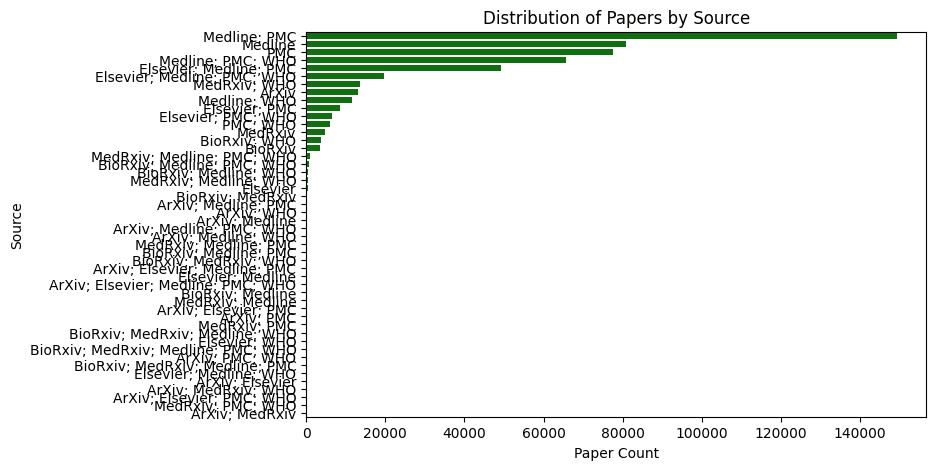

In [ ]:
# ----- 5. Plot distribution of paper counts by source_x -----
source_counts = df_clean['source_x'].value_counts()
print("\nPaper count by source:\n", source_counts)

plt.figure(figsize=(8,5))
sns.barplot(y=source_counts.index, x=source_counts.values, color='green')
plt.title("Distribution of Papers by Source")
plt.xlabel("Paper Count")
plt.ylabel("Source")
plt.show()


## Streamlit App
- Users can filter papers by year
- View sample data
- See dynamic visualizations including a word cloud



In [66]:
!pip install streamlit==1.27.2 pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: pillow
    Found existing installation: pillow 11.3.0
    Uninstalling pillow-11.3.0:
      Successfully uninstalled pillow-11.3.0
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfull

In [3]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.title("CORD-19 Data Explorer")
st.write("Interactive demo for exploring the COVID-19 research metadata.")

@st.cache_data
def load_data():
    df = pd.read_csv("metadata.csv", low_memory=False)
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
    df = df.dropna(subset=['publish_time'])
    df['year'] = df['publish_time'].dt.year
    return df

df = load_data()

year_range = st.slider("Select Year Range",
                       int(df['year'].min()),
                       int(df['year'].max()),
                       (2020, 2021))

sources = st.multiselect("Filter by Source",
                         options=df['source_x'].dropna().unique(),
                         default=[])

filtered = df[(df['year'] >= year_range[0]) & (df['year'] <= year_range[1])]
if sources:
    filtered = filtered[filtered['source_x'].isin(sources)]

st.write(f"Showing {len(filtered):,} papers")
st.dataframe(filtered[['title', 'journal', 'year', 'source_x']].head(20))

fig, ax = plt.subplots(figsize=(8,4))
year_counts = filtered['year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values, ax=ax, color='steelblue')
ax.set_xlabel("Year"); ax.set_ylabel("Paper Count")
st.pyplot(fig)


Writing app.py


In [5]:
from pyngrok import ngrok
ngrok.set_auth_token("32rDjFtBTtTUYjtXbHjpCzS5qMD_2uykKvKjPZ3Zir7rvBB8e")


In [11]:
from pyngrok import ngrok
import subprocess
import time




In [12]:

# Start Streamlit in the background
subprocess.Popen([
    "streamlit", "run", "app.py",
    "--server.port", "8501",
    "--server.headless", "true"
])


<Popen: returncode: None args: ['streamlit', 'run', 'app.py', '--server.port...>

In [14]:


# Give Streamlit a few seconds to start
time.sleep(5)




In [17]:
!ngrok authtoken 32rDjFtBTtTUYjtXbHjpCzS5qMD_2uykKvKjPZ3Zir7rvBB8e


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [18]:

# Open ngrok tunnel
public_url = ngrok.connect(8501)
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://b8c7150e3244.ngrok-free.app" -> "http://localhost:8501"



# Findings
- COVID-19 research papers increased rapidly after 2020.  
- Certain journals contributed disproportionately to research output.  
- Common words in titles: "COVID," "SARS," "pandemic," "coronavirus."  
- Interactive Streamlit app allows intuitive exploration of trends and top journals.
# Reflection

### Challenges
- Data Quality: Many missing values required careful handling
- Date Parsing: Inconsistent publication dates
- Interactive App: Word clouds and dynamic visualizations needed extra effort
- Ngrok Deployment: Authentication and tunnel setup

### Learning Outcomes
- Learned to clean and prepare real-world datasets
- Gained experience in data analysis and visualization
- Developed skills for interactive apps with Streamlit
- Understood deployment and sharing of local apps
# Conclusion
This project demonstrates a complete workflow: loading, cleaning, analyzing, visualizing, and presenting COVID-19 research metadata.  
It provided practical experience in Python, pandas, data visualization, and interactive app development while highlighting challenges in handling real-world datasets.

